# आव्हान: डेटा सायन्सबद्दल मजकूराचे विश्लेषण

या उदाहरणात, पारंपरिक डेटा सायन्स प्रक्रियेच्या सर्व टप्प्यांचा समावेश असलेला एक साधा सराव करूया. तुम्हाला कोणताही कोड लिहायची गरज नाही, फक्त खालील सेल्सवर क्लिक करून त्यांना चालवा आणि परिणाम पाहा. आव्हान म्हणून, तुम्हाला वेगवेगळ्या डेटासह हा कोड वापरून पाहण्यास प्रोत्साहित केले जाते.

## उद्दिष्ट

या धड्यात, आपण डेटा सायन्सशी संबंधित वेगवेगळ्या संकल्पनांवर चर्चा केली आहे. **टेक्स्ट मायनिंग** करून आणखी संबंधित संकल्पना शोधण्याचा प्रयत्न करूया. आपण डेटा सायन्सबद्दलच्या मजकुरासह सुरुवात करू, त्यातून कीवर्ड्स काढू, आणि नंतर परिणामाचे दृश्यांकन करण्याचा प्रयत्न करू.

मजकूर म्हणून, मी विकिपीडियावरील डेटा सायन्स पृष्ठाचा वापर करणार आहे:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## चरण 1: डेटा मिळवणे

प्रत्येक डेटा सायन्स प्रक्रियेतील पहिलं पाऊल म्हणजे डेटा मिळवणे. यासाठी आपण `requests` लायब्ररीचा वापर करू:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## चरण 2: डेटाचे रूपांतर करणे

पुढील चरण म्हणजे डेटाला प्रक्रिया करण्यासाठी योग्य स्वरूपात रूपांतरित करणे. आपल्या बाबतीत, आपण पृष्ठावरील HTML स्रोत कोड डाउनलोड केला आहे आणि तो साध्या मजकुरात रूपांतरित करणे आवश्यक आहे.

हे करण्याचे अनेक मार्ग आहेत. आपण Python मधील अंगभूत [HTMLParser](https://docs.python.org/3/library/html.parser.html) ऑब्जेक्टचा सर्वात सोपा वापर करू. आपल्याला `HTMLParser` वर्गाचे सबक्लासिंग करावे लागेल आणि HTML टॅग्समधील सर्व मजकूर गोळा करणारा कोड परिभाषित करावा लागेल, `<script>` आणि `<style>` टॅग्स वगळून.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## चरण ३: अंतर्दृष्टी मिळवणे

सर्वात महत्त्वाचे पाऊल म्हणजे आपला डेटा अशा स्वरूपात बदलणे ज्यातून आपण अंतर्दृष्टी मिळवू शकतो. आपल्या बाबतीत, आपल्याला मजकुरातून कीवर्ड्स काढायचे आहेत आणि कोणते कीवर्ड्स अधिक अर्थपूर्ण आहेत हे पाहायचे आहे.

कीवर्ड्स काढण्यासाठी आपण [RAKE](https://github.com/aneesha/RAKE) नावाची Python लायब्ररी वापरणार आहोत. प्रथम, ही लायब्ररी नसल्यास ती इंस्टॉल करूया:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


मुख्य कार्यक्षमता `Rake` ऑब्जेक्टमधून उपलब्ध आहे, ज्याला आपण काही पॅरामीटर्स वापरून सानुकूलित करू शकतो. आपल्या बाबतीत, आपण कीवर्डची किमान लांबी 5 अक्षरे, दस्तऐवजामध्ये कीवर्डची किमान वारंवारता 3, आणि कीवर्डमधील जास्तीत जास्त शब्दांची संख्या 2 निश्चित करू. इतर मूल्यांसह प्रयोग करण्यास मोकळ्या मनाने आणि परिणाम पाहण्यास तयार रहा.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

आम्हाला महत्त्वाच्या अंशांसह संलग्न असलेल्या संज्ञांची यादी मिळाली. जसे तुम्ही पाहू शकता, यादीच्या शीर्षस्थानी मशीन लर्निंग आणि बिग डेटा यांसारख्या सर्वात संबंधित शाखा आहेत.

## चरण ४: निकालाचे दृश्यरूपात सादरीकरण

लोक डेटा दृश्य स्वरूपात सर्वात चांगल्या प्रकारे समजून घेऊ शकतात. त्यामुळे डेटा दृश्यरूपात सादर करणे आणि काही अंतर्दृष्टी मिळवणे अनेकदा उपयुक्त ठरते. आपण Python मधील `matplotlib` लायब्ररीचा वापर करून कीवर्ड्सच्या महत्त्वासह साधी वितरण रचना तयार करू शकतो:


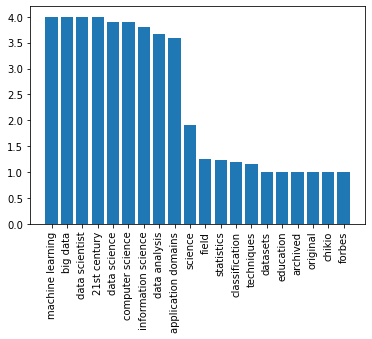

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

तथापि, शब्दांच्या वारंवारतेचे दृश्यीकरण करण्याचा आणखी चांगला मार्ग आहे - **शब्द मेघ** वापरणे. आपल्याला आपल्या कीवर्ड यादीतून शब्द मेघ तयार करण्यासाठी आणखी एक लायब्ररी स्थापित करावी लागेल.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` ऑब्जेक्ट मूळ मजकूर किंवा पूर्व-गणना केलेल्या शब्दांची त्यांची वारंवारता असलेली यादी घेण्यासाठी जबाबदार आहे आणि प्रतिमा परत करते, जी नंतर `matplotlib` वापरून प्रदर्शित केली जाऊ शकते:


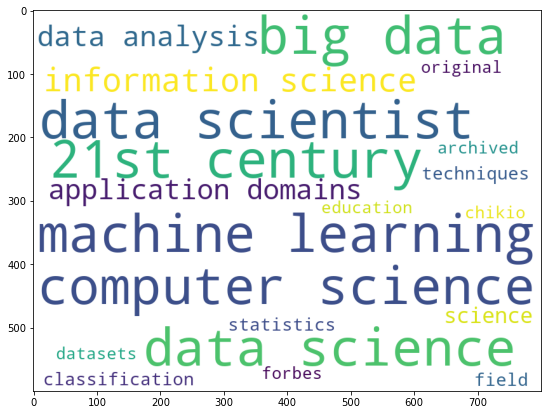

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

आम्ही मूळ मजकूर `WordCloud` ला देखील पास करू शकतो - पाहूया आपण समान परिणाम मिळवू शकतो का:


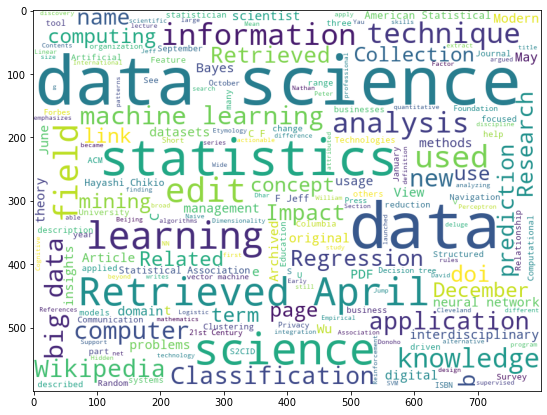

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

आपण पाहू शकता की शब्द मेघ आता अधिक प्रभावी दिसतो, परंतु त्यात बरेच गोंधळ देखील आहे (उदा. `Retrieved on` सारखे असंबंधित शब्द). तसेच, आपल्याला दोन शब्दांपासून बनलेले कमी कीवर्ड मिळतात, जसे *डेटा सायंटिस्ट* किंवा *कंप्युटर सायन्स*. याचे कारण RAKE अल्गोरिदम मजकुरातून चांगले कीवर्ड निवडण्यात अधिक चांगले कार्य करते. हा उदाहरण डेटा पूर्व-प्रक्रिया आणि स्वच्छतेचे महत्त्व स्पष्ट करते, कारण शेवटी स्पष्ट चित्र आपल्याला चांगले निर्णय घेण्यास मदत करेल.

या सरावामध्ये आपण Wikipedia मजकुरातून काही अर्थ काढण्याच्या सोप्या प्रक्रियेतून गेलो आहोत, कीवर्ड आणि शब्द मेघाच्या स्वरूपात. हा उदाहरण खूप सोपा आहे, परंतु तो डेटा सायंटिस्ट डेटा सोबत काम करताना घेतलेल्या सर्व सामान्य टप्प्यांचे चांगले प्रदर्शन करतो, डेटा मिळवण्यापासून ते व्हिज्युअलायझेशनपर्यंत.

आमच्या अभ्यासक्रमात आपण हे सर्व टप्पे सविस्तरपणे चर्चा करू.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील मूळ दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी, व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवलेल्या कोणत्याही गैरसमजांकरिता किंवा चुकीच्या अर्थ लावण्याकरिता आम्ही जबाबदार राहणार नाही.
